# Image Classification with CIFAR-10 Dataset

## CIFAR-10 Dataset Overview

The CIFAR-10 dataset is a popular dataset used for image classification tasks. Below is a simple description of the dataset:

### Total Images:
- **60,000** color images.

### Image Size:
- Each image is **32x32 pixels** with 3 color channels (RGB).

### Classes:
- The dataset has **10 different categories**, and each class has **6,000 images**.

### The 10 classes are:
- Airplane
- Automobile
- Bird
- Cat
- Deer
- Dog
- Frog
- Horse
- Ship
- Truck

### Training Set:
- **50,000** images.

### Test Set:
- **10,000** images.


# What is a CNN?

A **Convolutional Neural Network (CNN)** is a type of deep learning model designed to process and classify images. CNNs are particularly effective for image data because they can automatically detect and learn patterns such as edges, textures, and shapes.

## Key Components of a CNN:

### 1. Convolutional Layers:
- These layers apply filters to the input images to extract important features like edges or color gradients.
- Filters slide over the image, capturing patterns, and generating feature maps that help identify objects in the image.

### 2. Activation Function (ReLU):
- The **Rectified Linear Unit (ReLU)** is often used to introduce non-linearity into the model. It simply replaces negative values in the feature map with zeros, keeping the important information.

### 3. Pooling Layers:
- Pooling layers reduce the size of the feature maps, helping to simplify the model and make it more efficient.
- **Max pooling** is the most common type, which picks the maximum value from a small region of the image, retaining the most important features.

### 4. Fully Connected Layers (Dense Layers):
- After several convolutional and pooling layers, the feature maps are flattened into a 1D array, which is passed to fully connected layers.
- These layers perform the final classification based on the learned features.

## How CNNs Work for Image Classification:
For a task like **CIFAR-10 image classification**, CNNs work by:
- Detecting simple patterns (edges) in early layers.
- Learning more complex patterns (shapes, objects) in deeper layers.
- Using these learned patterns to classify the image into one of the 10 categories.

## Why CNNs Are Effective:
CNNs are powerful for image classification because they:
- **Preserve spatial relationships** between pixels.
- **Automatically learn** useful features from images without manual intervention.
- **Reduce complexity** by downsampling data with pooling, making models more efficient.


# Using CNN to classify images trained from the CIFAR-10 Dataset

In [12]:
# Import necessary libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
import numpy as np
import os
import pickle

In [13]:
# Function to load the CIFAR-10 dataset from local files
def load_cifar10(data_dir):
    x_train, y_train = [], []
    x_test, y_test = [], []
    
    # Load training batches
    for i in range(1, 6):
        with open(os.path.join(data_dir, f'data_batch_{i}'), 'rb') as file:
            batch = pickle.load(file, encoding='latin1')
            x_train.append(batch['data'])
            y_train += batch['labels']
    
    # Load test batch
    with open(os.path.join(data_dir, 'test_batch'), 'rb') as file:
        test_batch = pickle.load(file, encoding='latin1')
        x_test.append(test_batch['data'])
        y_test = test_batch['labels']
    
    # Convert to numpy arrays and reshape
    x_train = np.concatenate(x_train)
    x_train = x_train.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)  # Reshape to (N, 32, 32, 3)
    y_train = np.array(y_train)
    
    x_test = np.concatenate(x_test)
    x_test = x_test.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)  # Reshape to (N, 32, 32, 3)
    y_test = np.array(y_test)
    
    return (x_train, y_train), (x_test, y_test)

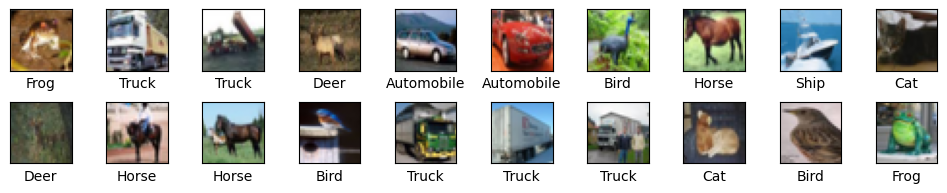

In [14]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = load_cifar10("../datasets/cifar-10-batches-py")
# Normalize the pixel values (scale them to the range 0-1)
x_train, x_test = x_train / 255.0, x_test / 255.0
# Define the class names for CIFAR-10
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Visualize some of the training data 
plt.figure(figsize=(12, 2))
for i in range(20):
    plt.subplot(2, 10, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i]], fontsize=10)  

plt.subplots_adjust(hspace=0.5, wspace=0.5)  
plt.show()

In [15]:
# Build a simple Convolutional Neural Network (CNN) model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)  # 10 output neurons for 10 classes
])
# Compile the model
model.compile(
    optimizer='adam',  # Adam optimizer is used for adjusting learning rate during training.
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  # Sparse categorical cross-entropy for multi-class classification.
    metrics=['accuracy']  # The model will track accuracy during training and evaluation.
)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
# Train the model
# History object contains details about the training process, 
# including the loss, accuracy, and other metrics at each epoch for both the training and validation sets.
history = model.fit(x_train, 
                    y_train, 
                    epochs=100, 
                    validation_data=(x_test, y_test))




Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 145s 90ms/step - accuracy: 0.3396 - loss: 1.7880 - val_accuracy: 0.5572 - val_loss: 1.2202
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 145s 93ms/step - accuracy: 0.5717 - loss: 1.2001 - val_accuracy: 0.6170 - val_loss: 1.0684
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 189s 85ms/step - accuracy: 0.6382 - loss: 1.0227 - val_accuracy: 0.6573 - val_loss: 0.9733
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 125s 80ms/step - accuracy: 0.6745 - loss: 0.9234 - val_accuracy: 0.6688 - val_loss: 0.9322
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 126s 81ms/step - accuracy: 0.7056 - loss: 0.8383 - val_accuracy: 0.6854 - val_loss: 0.8972
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 111s 71ms/step - accuracy: 0.7287 - loss: 0.7747 - val_accuracy: 0.7034 - val_loss: 0.8644
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 148s 74ms/step - accuracy: 0.7501 - loss: 0.7106 - val_accuracy: 0.7065 - val_loss: 0.8709
Epoch 8/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 135s 86ms/step - ac

In [39]:
# Accuracy and Loss
print("Accuracy: ", history.history['accuracy'][-1])
print("Loss: ", history.history['loss'][-1])


Accuracy:  0.9735400080680847
Loss:  0.08636835962533951


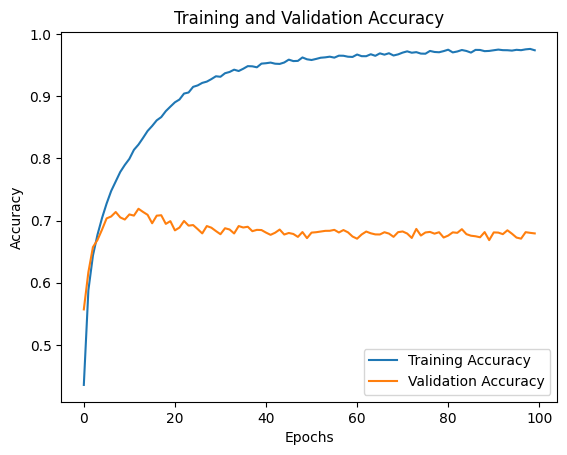

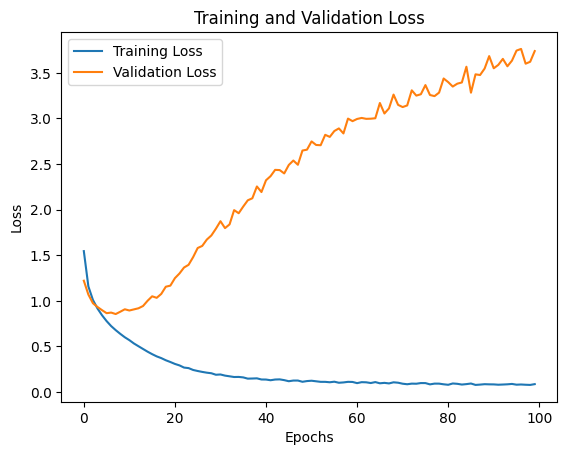

In [18]:
# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Classifying image: frog-2.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


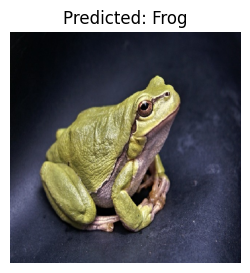

Classifying image: horse-1.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


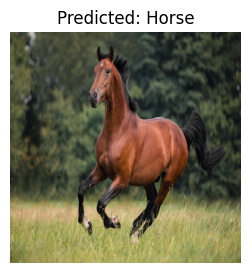

Classifying image: truck-2.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


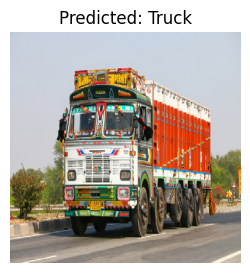

Classifying image: bird-1.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


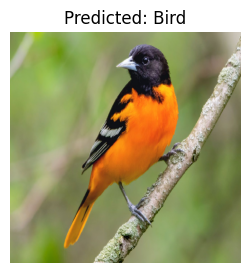

In [19]:
from tensorflow.keras.preprocessing import image

# Load and preprocess the image
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(32, 32))  # Resize the image to 32x32
    img_array = image.img_to_array(img)  # Convert to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize pixel values to [0, 1]
    return img_array

# Function to make predictions and display the result
def classify_image(img_path, model, class_names):
    img_array = load_and_preprocess_image(img_path)
    
    # Make predictions
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)[0]  # Get the class with highest probability
    
    # Display the image
    img = image.load_img(img_path, target_size=(512, 512))
    plt.figure(figsize=(3, 3))  # Reduce the figure size
    plt.imshow(img)
    plt.title(f"Predicted: {class_names[predicted_class]}")
    plt.axis('off')
    plt.show()

# Classify all images in a directory
def classify_images_in_directory(directory_path, model, class_names):
    for filename in os.listdir(directory_path):
        if filename.endswith((".jpg", ".jpeg", ".png")):  # Only process image files
            image = os.path.join(directory_path, filename)
            print(f"Classifying image: {filename}")
            classify_image(image, model, class_names)

# Path to the image directory
image_directory = '../datasets/images'

# Classify all images in the directory
classify_images_in_directory(image_directory, model, class_names)
